# 1. Loading Necessary Libraries

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sklearn
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification 
from sklearn import metrics

from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 2. Loading the Dataset and Splitting into Training and Testing

Original Data shape (45211, 16)
The shape of X_train is: (31647, 16)
The shape of X_test is: (13564, 16)
The shape of y_train is: (31647,)
The shape of y_test is: (13564,)
no     39922
yes     5289
Name: y, dtype: int64


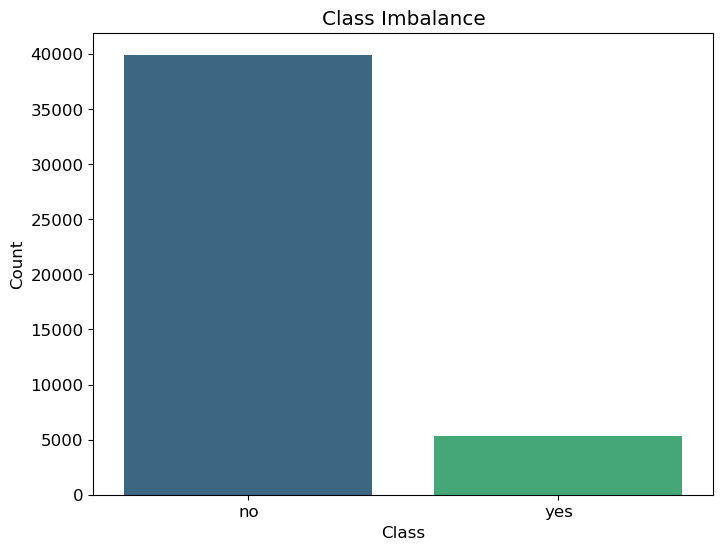

In [53]:
marketting = pd.read_csv('bank_term.csv')


X = marketting.drop(columns=['y'])  # Features
y = marketting['y']  # Target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#checking the shape of the test and train dataset
print('Original Data shape', X.shape)
print('The shape of X_train is:', X_train.shape)
print('The shape of X_test is:', X_test.shape)
print('The shape of y_train is:', y_train.shape)
print('The shape of y_test is:', y_test.shape)

# checking if the dataset has a balance class
class_counts = marketting['y'].value_counts()
print(class_counts)

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

plt.title('Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

# 3. Data Pre-processing on Training Dataset

### 3.1 Categorical Feature Encoding

In [54]:
# Encoding the Categorical variables
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
X_train_encoded = pd.get_dummies(X_train)

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

print(X_train_encoded.shape)
print(y_train_encoded.shape)

print(X_train)
print(X_train_encoded)

(31647, 51)
(31647,)
       age          job   marital  education default  balance housing loan  \
24951   58   management   married    primary      no     1021      no   no   
22129   55  blue-collar   married    unknown      no      196      no   no   
986     50       admin.   married  secondary      no      159     yes   no   
14999   43   management   married    primary      no     1880     yes   no   
4027    53   technician  divorced   tertiary      no      647     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
30403   35   management    single   tertiary      no      995      no   no   
21243   35   management   married   tertiary      no      750     yes   no   
42613   35   management   married   tertiary      no      323      no   no   
43567   70      retired   married  secondary      no      616      no   no   
2732    46  blue-collar    single  secondary      no       57     yes   no   

        contact  day month  duration  camp

### 3.2 Tackling Class Imbalance on Training Set

0    27953
1     3694
dtype: int64


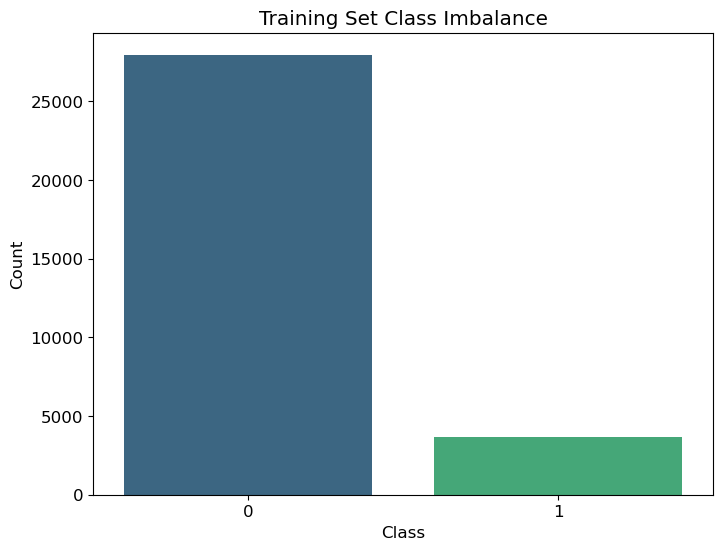

In [55]:
class_counts = pd.Series(y_train_encoded).value_counts()
print(class_counts)

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

plt.title('Training Set Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

In [56]:
# Applying SMOTE TECHNIQUE

# Making an instance of SMOTE class  
smote = SMOTE() 
  
# Fit predictor (x variable) and target (y variable) using fit_resample() 
X_train, y_train = smote.fit_resample(X_train_encoded, y_train_encoded) 
  
# Printing number of samples 
# in each class after Over-Sampling 
print('After SMOTE Sampling: ') 
print('Samples in class No ', (y_train == 0).sum()) 
print('Samples in class Yes ', (y_train == 1).sum())

After SMOTE Sampling: 
Samples in class No  27953
Samples in class Yes  27953


# 4 Data Pre-processing on Test Dataset

### 4.1 Categorical Feature Encoding

In [57]:

# Encoding the Categorical variables
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
X_test_encoded = pd.get_dummies(X_test)

# Encode target variable
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

print(X_test_encoded.shape)
print(y_test_encoded.shape)


print(X_test)
print(X_test_encoded)

(13564, 51)
(13564,)
       age          job  marital  education default  balance housing loan  \
14001   37   management  married   tertiary      no     1403     yes   no   
32046   36     services   single  secondary      no     -253     yes   no   
13318   47  blue-collar  married    primary      no     -406      no  yes   
42991   57    housemaid  married    primary      no      501     yes  yes   
14237   33  blue-collar  married  secondary     yes     -406     yes  yes   
...    ...          ...      ...        ...     ...      ...     ...  ...   
2666    31   technician  married   tertiary      no        0     yes  yes   
35730   48  blue-collar  married  secondary      no     5078     yes   no   
11495   39    housemaid  married   tertiary      no        4     yes  yes   
20975   42   technician  married   tertiary      no    13410      no  yes   
31975   38  blue-collar  married  secondary      no     1663     yes   no   

         contact  day month  duration  campaign  pdays

### 4.2 Tackling class Imbalance on Test Dataset

0    11969
1     1595
dtype: int64


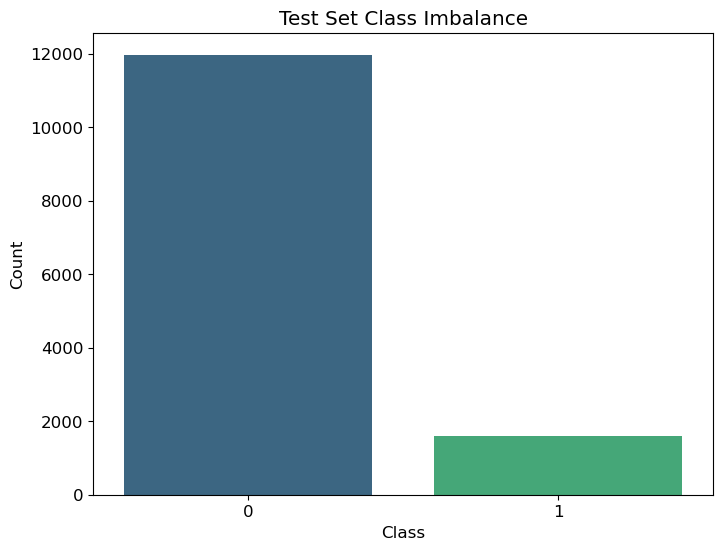

In [58]:
class_counts = pd.Series(y_test_encoded).value_counts()
print(class_counts)

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

plt.title('Test Set Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

In [59]:
# Applying SMOTE TECHNIQUE

# Making an instance of SMOTE class  
smote = SMOTE() 
  
# Fit predictor (x variable) and target (y variable) using fit_resample() 
X_test, y_test = smote.fit_resample(X_test_encoded, y_test_encoded) 
  
# Printing number of samples 
# in each class after Over-Sampling 
print('After SMOTE Sampling: ') 
print('Samples in class No ', (y_test == 0).sum()) 
print('Samples in class Yes ', (y_test == 1).sum())

After SMOTE Sampling: 
Samples in class No  11969
Samples in class Yes  11969


# 5a. Feature Scalling (Standardization)

In [60]:
from sklearn.preprocessing import StandardScaler

# Fit scaler on training data
scaler = StandardScaler()
# Transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform testing data
X_test_scaled = scaler.transform(X_test)


# 5b. Dimensionality Reduction

Cumulative percentage of variance explained by each component:
Components 1 to 1: 6.83%
Components 1 to 2: 12.28%
Components 1 to 3: 16.73%
Components 1 to 4: 20.85%
Components 1 to 5: 24.58%
Components 1 to 6: 27.97%
Components 1 to 7: 31.21%
Components 1 to 8: 34.18%
Components 1 to 9: 36.98%
Components 1 to 10: 39.64%
Components 1 to 11: 42.15%
Components 1 to 12: 44.55%
Components 1 to 13: 46.87%
Components 1 to 14: 49.13%
Components 1 to 15: 51.36%
Components 1 to 16: 53.56%
Components 1 to 17: 55.69%
Components 1 to 18: 57.80%
Components 1 to 19: 59.88%
Components 1 to 20: 61.94%
Components 1 to 21: 63.95%
Components 1 to 22: 65.93%
Components 1 to 23: 67.91%
Components 1 to 24: 69.87%
Components 1 to 25: 71.84%
Components 1 to 26: 73.79%
Components 1 to 27: 75.72%
Components 1 to 28: 77.56%
Components 1 to 29: 79.34%
Components 1 to 30: 81.11%
Components 1 to 31: 82.87%
Components 1 to 32: 84.57%
Components 1 to 33: 86.21%
Components 1 to 34: 87.81%
Components 1 to 35: 89.28%
Co

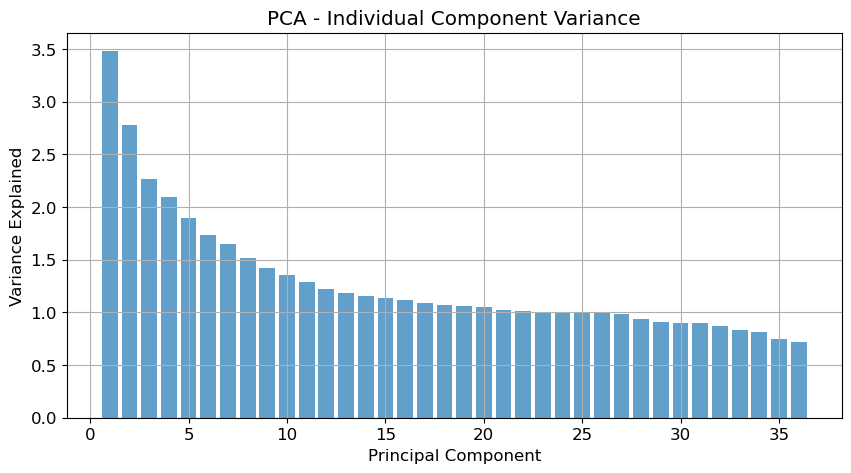

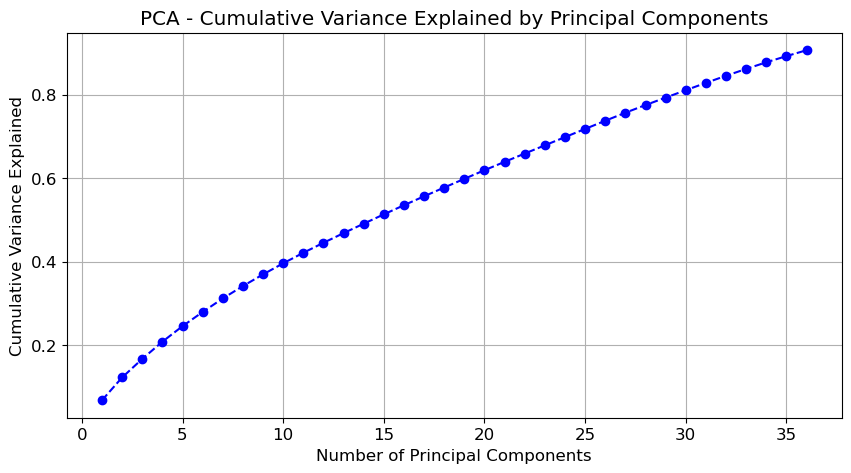

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA using 36 features
pca = PCA(n_components=36)


X_train_pca = pca.fit_transform(X_train_scaled)

# Individual component variance
individual_variance_smote = pca.explained_variance_

# Cumulative variance explained by each component
cumulative_variance_ratio_smote = np.cumsum(pca.explained_variance_ratio_)

# Print cumulative percentage of variance explained by each component
print("Cumulative percentage of variance explained by each component:")
for i, cumulative_variance in enumerate(cumulative_variance_ratio_smote):
    print(f"Components 1 to {i + 1}: {cumulative_variance * 100:.2f}%")

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance_smote) + 1), individual_variance_smote, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA - Individual Component Variance')
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio_smote) + 1), cumulative_variance_ratio_smote, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('PCA - Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()

X_test_pca = pca.transform(X_test_scaled)

#------------------------------------

# 6. Machine Learning Algorithm

### 6.1 K-Nearest Neigbhor

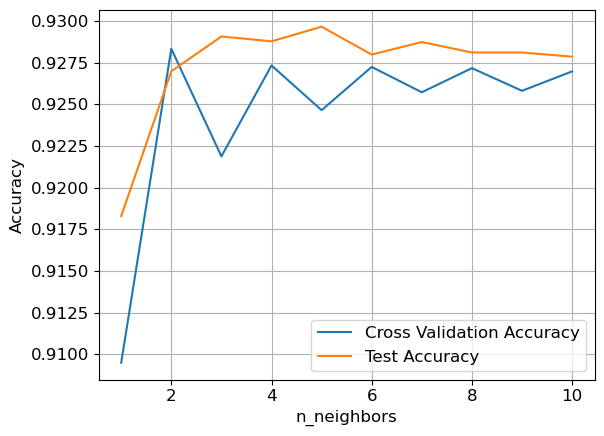

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# Initialize lists to store training and testing accuracies
cross_validation_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n in neighbors_settings:
    # Building the model
    knn = KNeighborsClassifier(n_neighbors=n)
    
    # Perform cross-validation on the training set
    cv_scores = cross_val_score(knn, X_train_pca, y_train, cv=5)  # 5-fold cross-validation
    
    # Record the mean training set accuracy
    cross_validation_accuracy.append(cv_scores.mean())
    
    # Fit the model to the entire training data
    knn.fit(X_train_pca, y_train)
    
    # Record the generalization accuracy on the test set
    test_accuracy.append(knn.score(X_test_pca, y_test))
    
#     # Calculate the confusion matrix
#     predicted = knn.predict(X_test)
#     confusion_matrix = metrics.confusion_matrix(y_test, predicted)

#     # Plot the confusion matrix
#     plt.figure(figsize=(0.5, 0.5))
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
#     cm_display.plot()
#     plt.title(f'Confusion Matrix for {n} Neighbors')
#     plt.show()
#     print('=================================================')

# Plotting the training, validation, and test accuracies
plt.plot(neighbors_settings, cross_validation_accuracy, label='Cross Validation Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.grid()
plt.legend()
plt.show()


### 6.2 Decision Tree

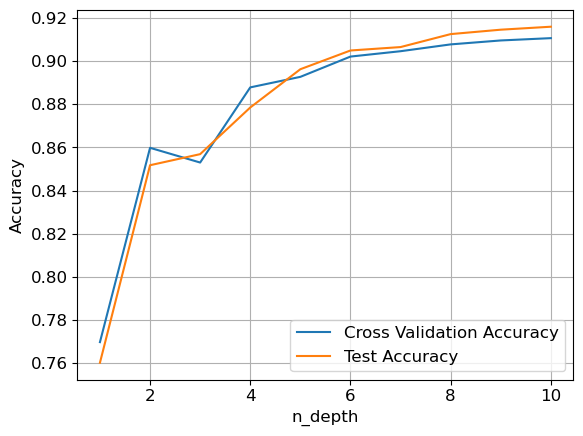

In [63]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

cross_validation_accuracy = []
test_accuracy = []
# try number of depths from 1 to 10

depth_settings = range(1,11)
for n in depth_settings:
    #building the model
    tree = DecisionTreeClassifier(max_depth=n, random_state=42)
    
    # Perform cross-validation on the training set
    cv_scores_tree = cross_val_score(tree, X_train_pca, y_train, cv=5)  # 5-fold cross-validation
    
    # Record the mean training set accuracy
    cross_validation_accuracy.append(cv_scores_tree.mean())
    
    # Fit the model to entire dataset
    tree.fit(X_train_pca, y_train)
    
    #record the generalisation accuracy
    test_accuracy.append(tree.score(X_test_pca, y_test))
    
#     predicted = tree.predict(X_test_pca)
#     # Calculate the confusion matrix
#     confusion_matrix = metrics.confusion_matrix(y_test, predicted)

#     # Plot the confusion matrix
#     plt.figure(figsize=(0.5, 0.5))  
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
#     cm_display.plot()
#     plt.title(f'Confusion Matrix for {n} Depth')
#     plt.show()
#     print('=================================================')

plt.plot(depth_settings, cross_validation_accuracy, label = 'Cross Validation Accuracy')
plt.plot(depth_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Accuracy'),
plt.xlabel('n_depth')
plt.grid()
plt.legend()


### 6.3 Random Forest

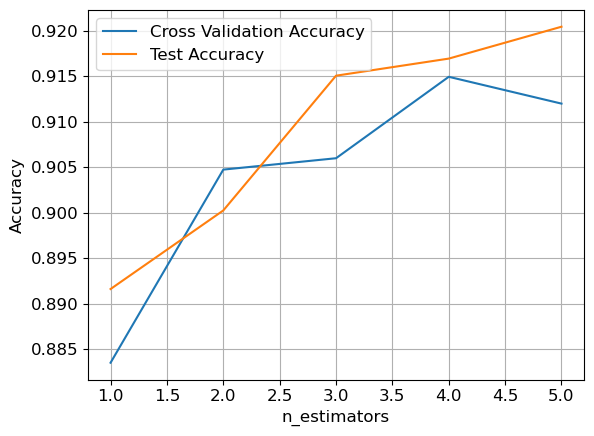

In [64]:
#Random Forest for SMOTE

from sklearn.ensemble import RandomForestClassifier
  
cross_validation_accuracy = []
test_accuracy = []
# try number of depths from 1 to 5

estimators_settings = range(1,6)
for n in estimators_settings:
    #building the model
    forest = RandomForestClassifier(n_estimators=n, max_features='sqrt', random_state=3)
    
    # Perform cross-validation on the training set
    cv_scores_forest = cross_val_score(forest, X_train_pca, y_train, cv=5) # 5-fold cross-validation
    
    # Record the mean training set accuracy
    cross_validation_accuracy.append(cv_scores_forest.mean())
    
    # Fit the model to the entire dataset
    forest.fit(X_train_pca, y_train)
    
    #record the generalisation accuracy
    test_accuracy.append(forest.score(X_test_pca, y_test))
    
#     predicted = forest.predict(X_test_pca)
#     # Calculate the confusion matrix
#     confusion_matrix = metrics.confusion_matrix(y_test, predicted)

#     # Plot the confusion matrix
#     plt.figure(figsize=(0.5, 0.5))  
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
#     cm_display.plot()
#     plt.title(f'Confusion Matrix for {n} Estimators')
#     plt.show()
#     print('=================================================')

plt.plot(estimators_settings, cross_validation_accuracy, label = 'Cross Validation Accuracy')
plt.plot(estimators_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Accuracy'),
plt.xlabel('n_estimators')
plt.grid()
plt.legend()

### 6.4 Gradient Boosting

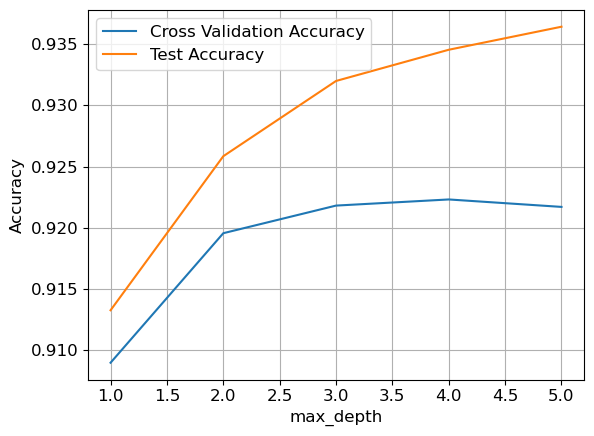

In [65]:
#Random Forest for SMOTE

from sklearn.ensemble import GradientBoostingClassifier
  
cross_validation_accuracy = []
test_accuracy = []
# try number of depths from 1 to 5

parameters_settings = range(1,6)
for n in estimators_settings:
    #building the model
    gbrt = GradientBoostingClassifier(max_depth=n, random_state=2)
    
     # Perform cross-validation on the training set
    cv_scores_gbrt = cross_val_score(gbrt, X_train_pca, y_train, cv=5)  # 5-fold cross-validation
    
    # Record the mean training set accuracy
    cross_validation_accuracy.append(cv_scores_gbrt.mean())
    
    # Fit the model into the entire dataset
    gbrt.fit(X_train_pca, y_train)
    
    #record the generalisation accuracy
    test_accuracy.append(gbrt.score(X_test_pca, y_test))
    
#     predicted = gbrt.predict(X_test_pca)
#     # Calculate the confusion matrix
#     confusion_matrix = metrics.confusion_matrix(y_test, predicted)

#     # Plot the confusion matrix
#     plt.figure(figsize=(0.5, 0.5))  
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
#     cm_display.plot()
#     plt.title(f'Confusion Matrix for {n} Max_depth')
#     plt.show()
#     print('=================================================')

plt.plot(parameters_settings, cross_validation_accuracy, label = 'Cross Validation Accuracy')
plt.plot(parameters_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Accuracy'),
plt.xlabel('max_depth')
plt.grid()
plt.legend()


### 6.5 Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.001)

# Perform cross-validation on the training set
cv_scores_logreg = cross_val_score(logreg, X_train_pca, y_train, cv=5)  # 5-fold cross-validation
    
# Record the mean training set accuracy
cross_validation_accuracy = cv_scores_logreg.mean()

# Fit the model to entire dataset
logreg.fit(X_train_pca, y_train)

#record the generalisation accuracy
test_accuracy = logreg.score(X_test_pca, y_test)
    
# predicted = logreg.predict(X_test_pca)
# # Calculate the confusion matrix
# confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# # Plot the confusion matrix
# plt.figure(figsize=(0.5, 0.5))  
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
# cm_display.plot()
# plt.title('Linear Regression with C=0.001')
# plt.show()
# print('=================================================')

print(cross_validation_accuracy)
print(test_accuracy)

0.9306547516354644
0.9366279555518423


## Metrics

METRICS FOR KNN
Cross Validation 5 Fold:
Accuracy: 0.9233058361382881
Variation +/-: 0.09764167633425275

Metrics:
Accuracy: 0.9296515999665803
Precision: 0.962164105329379
Specificity: 0.9648257999832902
Sensitivity/Recall: 0.8944773999498705
F1 Measure: 0.927086941461725
G Measure: 0.927086941461725
Mathews Corr Coef: 0.8614374264396756
Time taken: 1.6501200199127197


<Figure size 50x50 with 0 Axes>

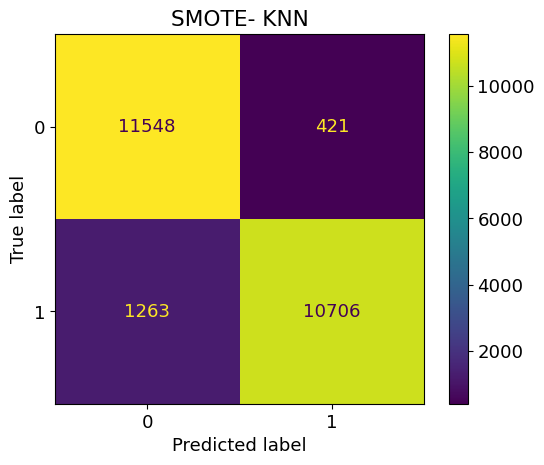

METRICS FOR DECISION TREE
Cross Validation 5 Fold:
Accuracy: 0.8997445218086648
Variation +/-: 0.0943303441431406

Metrics:
Accuracy: 0.9065502548249645
Precision: 0.9402823018458197
Specificity: 0.9448575486673908
Sensitivity/Recall: 0.8682429609825382
F1 Measure: 0.9028278528300246
G Measure: 0.9028278528300246
Mathews Corr Coef: 0.8154974335876456
Time taken: 2.3532214164733887


<Figure size 50x50 with 0 Axes>

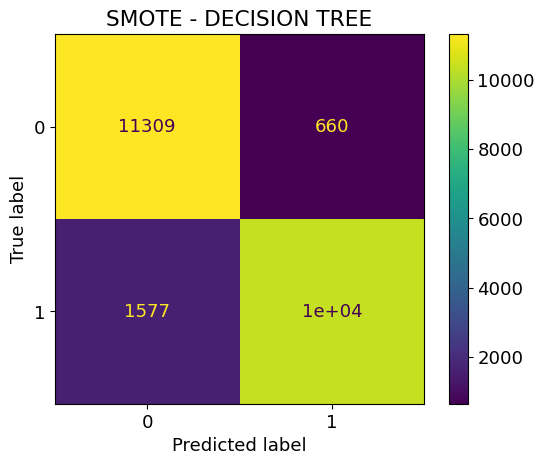

METRICS FOR RANDOM FOREST
Cross Validation 5 Fold:
Accuracy: 0.9105652073223236
Variation +/-: 0.10769656723485045

Metrics:
Accuracy: 0.9204611914111455
Precision: 0.9426510686955757
Specificity: 0.9455259420168769
Sensitivity/Recall: 0.895396440805414
F1 Measure: 0.9184163167366527
G Measure: 0.9184163167366527
Mathews Corr Coef: 0.8419809834651739
Time taken: 3.8024754524230957


<Figure size 50x50 with 0 Axes>

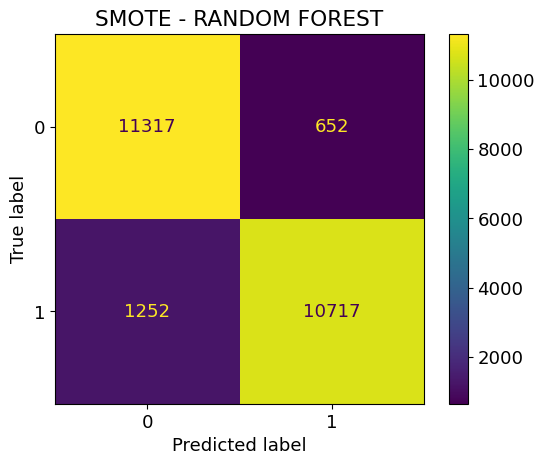

METRICS FOR GRADIENT BOOSTING
Cross Validation 5 Fold:
Accuracy: 0.9187947586395137
Variation +/-: 0.11118516482828751

Metrics:
Accuracy: 0.934539226334698
Precision: 0.9595334864817106
Specificity: 0.9617344807419166
Sensitivity/Recall: 0.9073439719274793
F1 Measure: 0.9327092369132993
G Measure: 0.9327092369132993
Mathews Corr Coef: 0.8703668212582483
Time taken: 212.61908268928528


<Figure size 50x50 with 0 Axes>

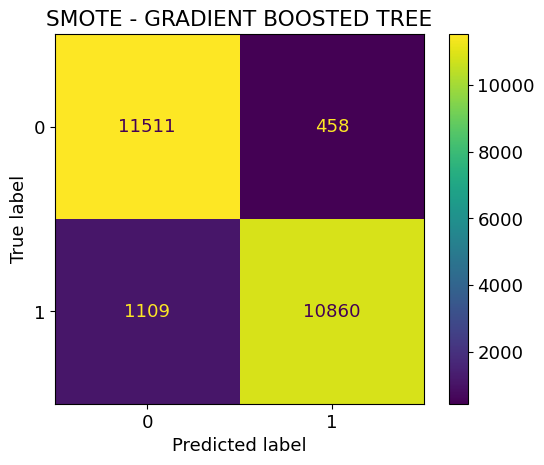

METRICS FOR LOGISTIC REGRESSION
Cross Validation 5 Fold:
Accuracy: 0.9273996215383526
Variation +/-: 0.09247227189642712

Metrics:
Accuracy: 0.9366279555518423
Precision: 0.9589847180748288
Specificity: 0.9609825382237447
Sensitivity/Recall: 0.9122733728799398
F1 Measure: 0.9350460286876472
G Measure: 0.9350460286876472
Mathews Corr Coef: 0.8742936941111251
Time taken: 0.08871293067932129


<Figure size 50x50 with 0 Axes>

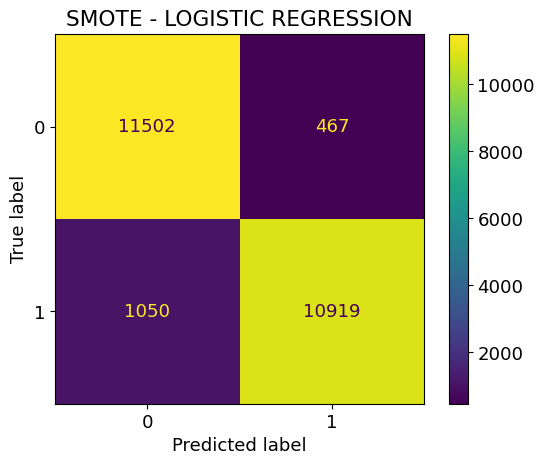

In [68]:
# METRICS

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
import time

# Function to compute metrics
def compute_metrics(model, X, y):
    # Cross-validation 5 folds
    start_time = time.time()
    cv_scores = cross_val_score(model, X, y, cv=5)
    end_time = time.time()
    time_taken = end_time - start_time
    
    # Accuracy and Variation
    accuracy = cv_scores.mean()
    variation = cv_scores.std()
    
    # Metrics
    y_pred = model.predict(X)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    specificity = (y_pred[y == 0] == 0).sum() / (y == 0).sum()
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)
    mcc = matthews_corrcoef(y, y_pred)
    
    # Print results
    print("Cross Validation 5 Fold:")
    print("Accuracy:", accuracy)
    print("Variation +/-:", variation)
    print("\nMetrics:")
    print("Accuracy:", accuracy_score(y, y_pred))
    print("Precision:", precision)
    print("Specificity:", specificity)
    print("Sensitivity/Recall:", recall)
    print("F1 Measure:", f1)
    print("G Measure:", 2 * (precision * recall) / (precision + recall))
    print("Mathews Corr Coef:", mcc)
    print("Time taken:", time_taken)

plt.rcParams.update({'font.size': 13})
print('METRICS FOR KNN')
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_pca, y_train)
compute_metrics(knn, X_test_pca, y_test)

predicted = knn.predict(X_test_pca)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('SMOTE- KNN',)
plt.show()

print('=============================================')
print('=============================================')

print('METRICS FOR DECISION TREE')
tree = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train_pca, y_train)
compute_metrics(tree, X_test_pca, y_test)

predicted = tree.predict(X_test_pca)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('SMOTE - DECISION TREE')
plt.show()

print('=============================================')
print('=============================================')

print('METRICS FOR RANDOM FOREST')
forest = RandomForestClassifier(n_estimators=5, max_features='sqrt', random_state=3).fit(X_train_pca, y_train)
compute_metrics(forest, X_test_pca, y_test)

predicted = forest.predict(X_test_pca)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('SMOTE - RANDOM FOREST')
plt.show()

print('=============================================')
print('=============================================')

print('METRICS FOR GRADIENT BOOSTING')
gbrt = GradientBoostingClassifier(max_depth=4, random_state=2).fit(X_train_pca, y_train)
compute_metrics(gbrt, X_test_pca, y_test)

predicted = gbrt.predict(X_test_pca)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('SMOTE - GRADIENT BOOSTED TREE')
plt.show()

print('=============================================')
print('=============================================')

print('METRICS FOR LOGISTIC REGRESSION')
logreg = LogisticRegression(C=0.001).fit(X_train_pca, y_train)
compute_metrics(logreg, X_test_pca, y_test)

predicted = logreg.predict(X_test_pca)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('SMOTE - LOGISTIC REGRESSION')
plt.show()

print('=============================================')
print('=============================================')


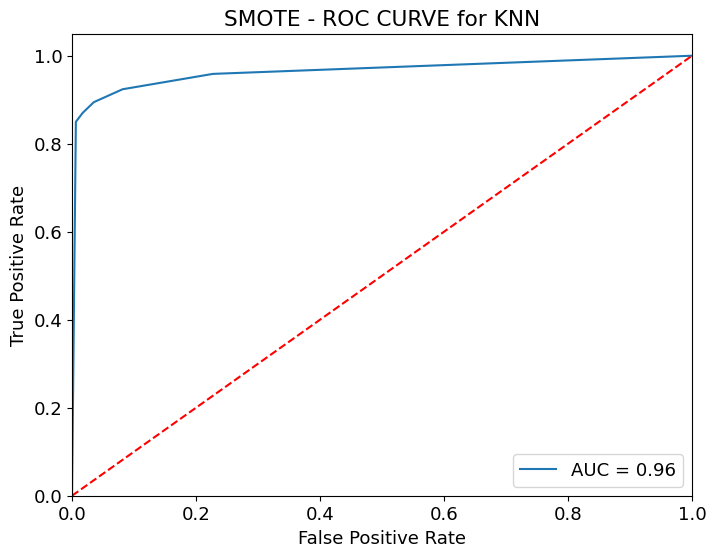

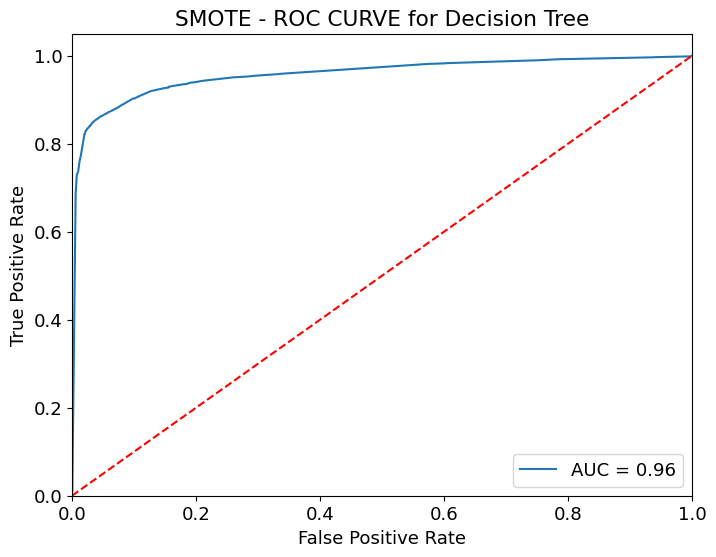

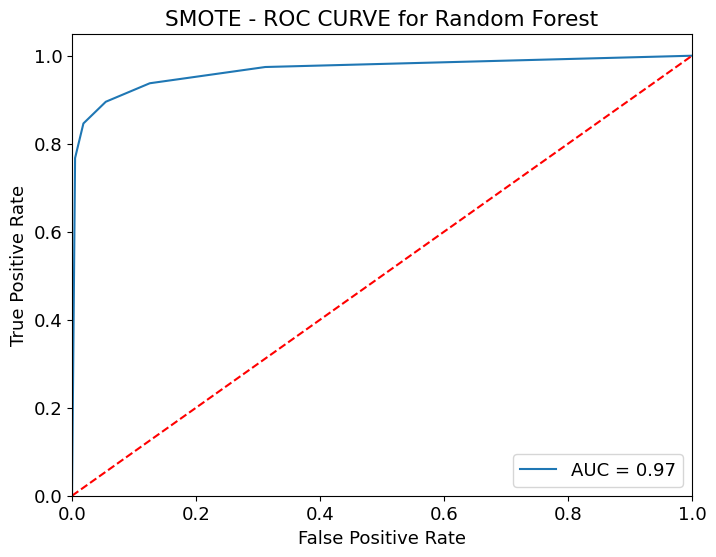

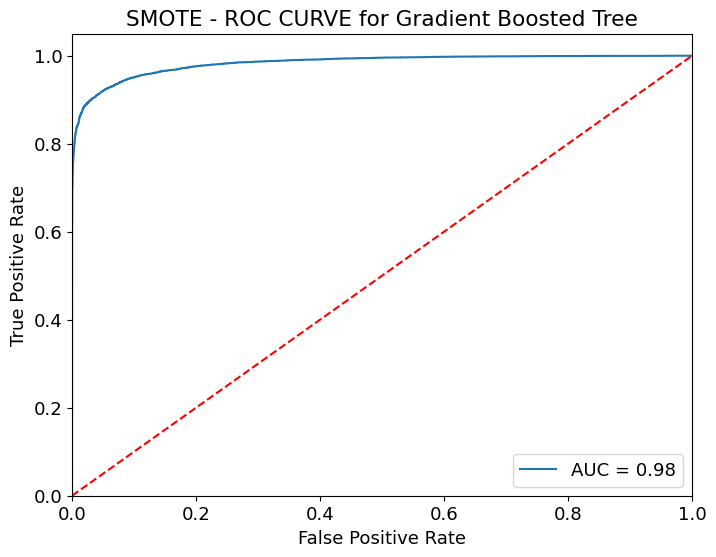

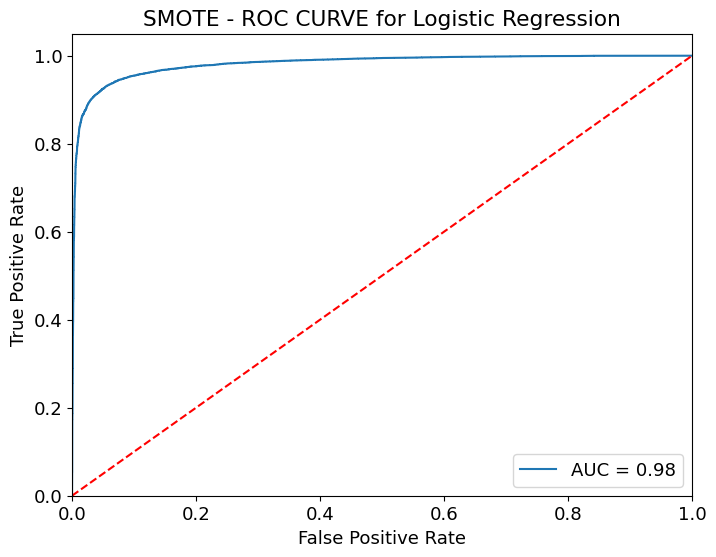

In [69]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test sets
def roc_plot(model, name):
    probs = model.predict_proba(X_test_pca)[:, 1]

    # Calculate ROC curve and AUC for each model
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)


    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)

    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'SMOTE - ROC CURVE for {name}')
    plt.legend(loc='lower right')
    plt.show()


roc_plot(knn, 'KNN')
roc_plot(tree, 'Decision Tree')
roc_plot(forest, 'Random Forest')
roc_plot(gbrt, 'Gradient Boosted Tree')
roc_plot(logreg, 'Logistic Regression')
